Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 26-September-2025

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set parameters
data_dir = r'Z:/Data/Roadrunner/'
sampling_rate = 150 # Hz

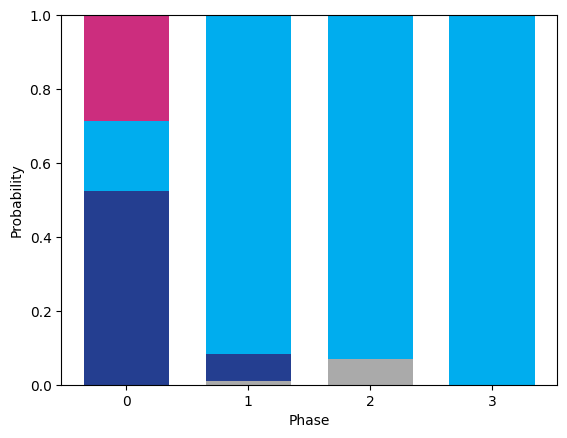

In [76]:
# Plot probability of behavior per phase

# Load data
dataset = 'gap_empty_cschrimson.csv'
df = pd.read_csv(data_dir+dataset) 

# Initialize variables
behaviors = ['none','cross','abort','backward','fall']
phases = [0,1,2,3]
counts = np.zeros((len(behaviors),len(phases)))
colors = [[204/255,45/255,126/255],
          [0/255,173/255,238/255], 
          [36/255,62/255,144/255],
          [0/255,191/255,191/255],
          [170/255,170/255,170/255]]

# Compute probability 
for phase_index, phase in enumerate(phases):
    df_sub = df[(df["phase"] == phase) & df["behavior"].isin(behaviors)] 
    phase_counts = df_sub.value_counts("behavior", normalize=True).sort_index()
    keys = phase_counts.index.tolist()
    
    for key in keys:
        counts[behaviors.index(key), phase_index] = phase_counts[key]   

# Flip data for plotting
counts = np.flipud(counts)
colors = np.flipud(colors)

# Plot probability
fig, ax = plt.subplots()
for phase in range(counts.shape[1]):
    bottom = 0
    for behavior in range(counts.shape[0]):
        p = ax.bar(phase, counts[behavior, phase], bottom=bottom, width=0.7, label=f"label {behavior}", color=colors[behavior])
        bottom += counts[behavior, phase]
plt.xticks([0,1,2,3])
plt.ylabel('Probability')
plt.xlabel('Phase')
#plt.savefig(r'C:\Users\Chris\Desktop\figure.eps')
plt.show()

In [77]:
# Get sample size
phase = 1 # 0, 1, 2, 3

df_sub = df[(df["phase"] == phase) & df["behavior"].isin(behaviors)] 
print('N = ' + str(len(df_sub["animal_id"].unique().tolist())))
print('n (total) = ' + str(df_sub["animal_id"].value_counts().sum()))

df_sub["animal_id"].value_counts()

N = 12
n (total) = 108


animal_id
9.0     16
11.0    15
12.0    14
3.0     12
4.0     11
8.0      9
7.0      9
6.0      7
13.0     5
2.0      4
1.0      4
5.0      2
Name: count, dtype: int64

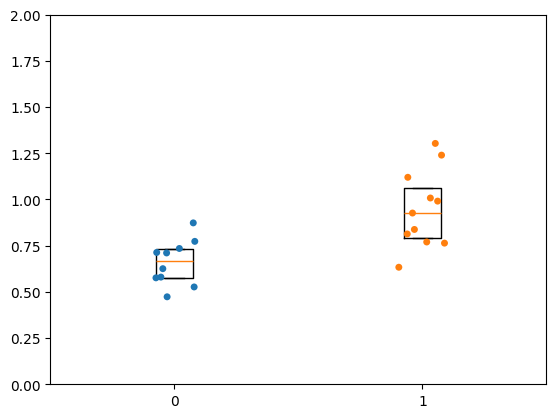

MannwhitneyuResult(statistic=np.float64(99.0), pvalue=np.float64(0.0021899994345199467))

In [38]:
# Plot cross duration 
per_trial = False
min_n_trials = 0 # 3

# Load data
dataset = 'gap_empty_cschrimson.csv'
df_ctrl = pd.read_csv(data_dir+dataset)
df_ctrl = df_ctrl.dropna(subset=["cross_start"])
animal_ids_to_include = df_ctrl['animal_id'].value_counts().loc[lambda x: x >= min_n_trials].index
df_ctrl = df_ctrl[df_ctrl.animal_id.isin(animal_ids_to_include)]

dataset = 'gap_rr_cschrimson.csv'
df_rr = pd.read_csv(data_dir+dataset)
df_rr = df_rr.dropna(subset=["cross_start"])
animal_ids_to_include = df_rr['animal_id'].value_counts().loc[lambda x: x >= min_n_trials].index
df_rr = df_rr[df_rr.animal_id.isin(animal_ids_to_include)]

# Initialize variables
cross_duration_ctrl = []
cross_duration_rr = []
n_events_ctrl = []
n_events_rr = []

if per_trial:
    # Compute cross duration per trial
    cross_duration_ctrl = (df_ctrl["cross_end"] - df_ctrl["cross_start"]) / sampling_rate
    cross_duration_ctrl = cross_duration_ctrl.tolist()
    
    cross_duration_rr = (df_rr["cross_end"] - df_rr["cross_start"]) / sampling_rate
    cross_duration_rr = cross_duration_rr.tolist()

else:
    # Compute mean cross duration per animal 
    animal_ids = df_ctrl.animal_id.unique().tolist()
    for animal_id in animal_ids:
        df_sub = df_ctrl[df_ctrl.animal_id==animal_id]
        cross_duration = (df_sub["cross_end"] - df_sub["cross_start"]) / sampling_rate
        cross_duration_ctrl.append(np.mean(cross_duration)) 
        n_events_ctrl.append(len(cross_duration))
        
    animal_ids = df_rr.animal_id.unique().tolist()
    for animal_id in animal_ids:
        df_sub = df_rr[df_rr.animal_id==animal_id]
        cross_duration = (df_sub["cross_end"] - df_sub["cross_start"]) / sampling_rate
        cross_duration_rr.append(np.mean(cross_duration)) 
        n_events_rr.append(len(cross_duration))

# Plot  
plt.boxplot([cross_duration_rr, cross_duration_ctrl], positions=[0,1], showfliers=False, whis=0)
sns.stripplot([cross_duration_rr, cross_duration_ctrl])
plt.ylim([0,2])
#plt.savefig(r'C:\Users\Chris\Desktop\figure.eps', format='eps', transparent=True)
plt.show()

# Test for normality 
#scipy.stats.normaltest(cross_duration_RR)

# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(cross_duration_ctrl,cross_duration_rr)

In [41]:
n_events_ctrl

[3, 1, 3, 3, 2, 2, 5, 4, 7, 5, 1]

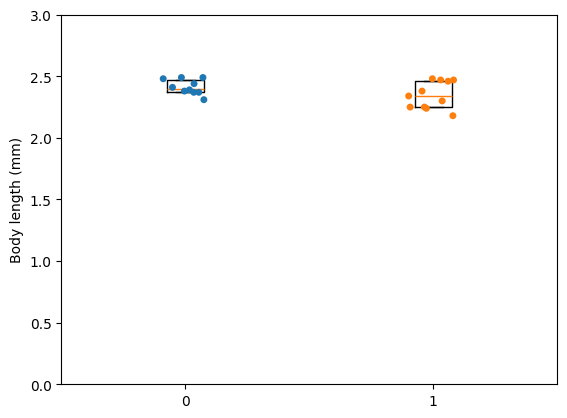

MannwhitneyuResult(statistic=np.float64(33.0), pvalue=np.float64(0.1292812360557783))

In [4]:
# Plot body lengths

# Load data 
# Consider only animals that contributed data to the cross duration analysis above
dataset = 'gap_empty_cschrimson.csv'
df_ctrl = pd.read_csv(data_dir+dataset)
df_ctrl = df_ctrl.dropna(subset=["cross_start"])
df_ctrl = df_ctrl[['animal_id', 'body_length']].drop_duplicates()
length_ctrl = df_ctrl.body_length.tolist()

dataset = 'gap_rr_cschrimson.csv'
df_rr = pd.read_csv(data_dir+dataset)
df_rr = df_rr.dropna(subset=["cross_start"])
df_rr = df_rr[['animal_id', 'body_length']].drop_duplicates()
length_rr = df_rr.body_length.tolist()

# Plot length 
plt.boxplot([length_rr, length_ctrl], positions=[0,1], showfliers=False, whis=0)
sns.stripplot([length_rr, length_ctrl])
plt.ylabel('Body length (mm)')
plt.ylim([0,3])
#plt.savefig(r'C:\Users\Chris\Desktop\figure.eps', format='eps', transparent=True)
plt.show()

# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(length_ctrl,length_rr)

In [13]:
#np.mean(length_ctrl)
#np.std(length_ctrl)/np.sqrt(len(length_ctrl))

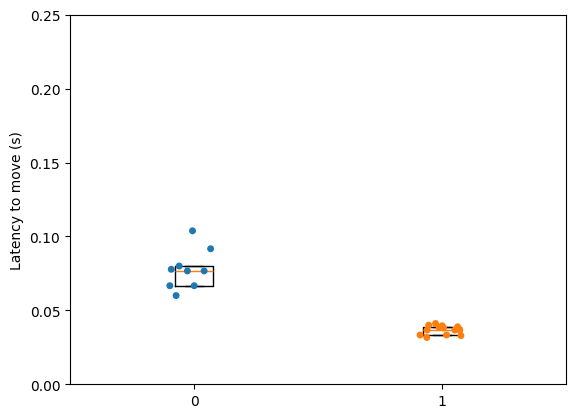

MannwhitneyuResult(statistic=np.float64(117.0), pvalue=np.float64(0.00010411153412795681))

In [35]:
# Plot latency to move
per_trial = False
min_n_trials = 0 # 3

# Load data 
dataset = 'gap_rr_cschrimson.csv'
df_rr = pd.read_csv(data_dir+dataset)
df_rr = df_rr.dropna(subset=["movement_onset"])
animal_ids_to_include = df_rr['animal_id'].value_counts().loc[lambda x: x >= min_n_trials].index
df_rr = df_rr[df_rr.animal_id.isin(animal_ids_to_include)]

dataset = 'gap_mdn_cschrimson.csv'
df_mdn = pd.read_csv(data_dir+dataset)
df_mdn = df_mdn.dropna(subset=["movement_onset"])
animal_ids_to_include = df_mdn['animal_id'].value_counts().loc[lambda x: x >= min_n_trials].index
df_mdn = df_mdn[df_mdn.animal_id.isin(animal_ids_to_include)]

# Initialize variables
latency_to_move_rr = []
latency_to_move_mdn = []
n_events_rr = []
n_events_mdn = []

if per_trial:
    # Compute latency per trial
    latency_to_move_rr = (df_rr["movement_onset"] - df_rr["stimulus_onset"]) / sampling_rate
    latency_to_move_rr = latency_to_move_rr.tolist()

    latency_to_move_mdn = (df_mdn["movement_onset"] - df_mdn["stimulus_onset"]) / sampling_rate
    latency_to_move_mdn = latency_to_move_mdn.tolist()

else:
    # Compute mean latency per animal 
    animal_ids = df_rr.animal_id.unique().tolist()
    for animal_id in animal_ids:
        df_sub = df_rr[df_rr.animal_id==animal_id]
        latencies = (df_sub["movement_onset"] - df_sub["stimulus_onset"]) / sampling_rate
        latency_to_move_rr.append(np.mean(latencies)) 
        n_events_rr.append(len(latencies))
            
    animal_ids = df_mdn.animal_id.unique().tolist()
    for animal_id in animal_ids:
        df_sub = df_mdn[df_mdn.animal_id==animal_id]
        latencies = (df_sub["movement_onset"] - df_sub["stimulus_onset"]) / sampling_rate
        latency_to_move_mdn.append(np.mean(latencies)) 
        n_events_mdn.append(len(latencies))

# Plot latency 
plt.boxplot([latency_to_move_rr, latency_to_move_mdn], positions=[0,1], showfliers=False, whis=0)
sns.stripplot([latency_to_move_rr, latency_to_move_mdn])
plt.ylabel('Latency to move (s)')
plt.ylim([0,0.25])
#plt.savefig(r'C:\Users\Chris\Desktop\figure.eps', format='eps', transparent=True)
plt.show()

# Mann-Whitney U test for non-normally distributed (nonparametric) data
scipy.stats.mannwhitneyu(latency_to_move_rr,latency_to_move_mdn)

In [37]:
n_events_mdn

[4, 4, 15, 11, 8, 5, 16, 6, 2, 2, 6, 3, 7]

In [82]:
## Kernel density estimation
#X = np.array(latency_to_move_RR)[:,np.newaxis]
#X_plot = np.linspace(0,0.25,1000)[:,np.newaxis]
#kde = KernelDensity(kernel="gaussian", bandwidth=0.005).fit(X)
#log_dens = kde.score_samples(X_plot)
#
#X2 = np.array(latency_to_move_MDN)[:,np.newaxis]
#X2_plot = np.linspace(0,0.25,1000)[:,np.newaxis]
#kde2 = KernelDensity(kernel="gaussian", bandwidth=0.005).fit(X2)
#log_dens2 = kde2.score_samples(X2_plot)
#
#plt.plot(X_plot[:, 0], np.exp(log_dens)/np.max(np.exp(log_dens)))
#plt.plot(X2_plot[:, 0], np.exp(log_dens2)/np.max(np.exp(log_dens2)))
##plt.savefig(r'C:\Users\Chris\Desktop\figure.eps', format='eps', transparent=True)
#plt.show()

In [129]:
# bin_width = 0.1
# bins = np.arange(0-bin_width/2, 2+bin_width, bin_width)
# plt.hist(duration_of_cross_ctrl, bins=bins, density=True)
# plt.xlim([0,2])